In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

def log_lin_regress(x, y):
        """
        Perform log linear least squares regression and return fitted log function
        and paramateres where function is the form:
            y = a * e ^ (b * x)
        """
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,np.log(y))
        intercept = np.e ** intercept
        y_reg = lambda x : intercept * np.e ** (slope * x)
        print(f"""
        slope:{slope}
        intercept:{intercept}
        r_value:{r_value}
        p_value:{p_value}
        std_err:{std_err}
        """)
        return (y_reg, intercept, slope)

In [9]:
data = pd.read_csv('../data.csv')

w = data['Week'].values.astype(float)
hd = data['HD'].values.astype(float)
he = data['HE'].values.astype(float)
ld = data['LD'].values.astype(float)
le = data['LE'].values.astype(float)
total = data['Total'].values.astype(float)

# print(data)
# Fix data for ll plots
def replace_zeros(array):
    nil = 0.1
    for i in range(len(array)):
        if array[i] == 0:
            array[i] = nil
    return array

# hd = replace_zeros(hd)
# he = replace_zeros(he)
# ld = replace_zeros(ld)
# le = replace_zeros(le)

print(data)

    Week  HD  LD  HE  LE  Total
0      1  10   5   8  25     48
1      2   7  10   6  19     42
2      3   6   5   5  16     32
3      4   7   4   8   8     27
4      5   2   5   2  14     23
5      6   3   3   1  16     23
6      7   1   2   1  15     19
7      8   3   1   3   9     16
8      9   1   4   1   7     13
9     10   0   2   3   5     10
10    11   1   1   1   5      8
11    12   1   1   4   3      9
12    13   2   0   3   2      7
13    14   2   1   2   2      7
14    15   1   1   0   1      3
15    16   0   0   1   1      2
16    17   2   2   0   0      4
17    18   0   1   0   1      2
18    19   1   2   0   1      4
19    20   0   0   1   0      1


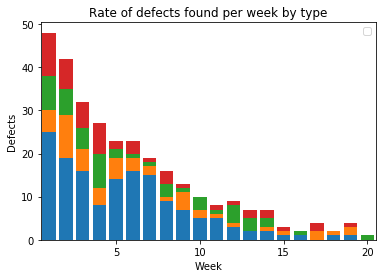

In [19]:


def stacked_histogram(x, hd, he, ld, le, cumulative=False):
    plt.figure()
    plot = plt.subplot()
    
    p1 = plot.bar(w, le)
    p2 = plot.bar(w, he, bottom=le)
    p3 = plot.bar(w, ld, bottom=le+he)
    p4 = plot.bar(w, hd, bottom=le+he+ld)

    plt.title('Rate of defects found per week by type')
    plt.ylabel('Defects')
    plt.xlabel('Week')
    plt.legend((p4[0], p3[0], p2[0], p1[0]), ())
    plt.xticks([5,10,15,20])
    plt.xlim((0.5,20.5))

    plt.show()
    
stacked_histogram(w, hd, ld, he, le)

In [10]:


def cumulative_stacked_histogram(x, hb, hs, eb, es):
    def cumulative_total(x):
        c_x = [x[0]]
        for i in range(1, len(x)):
            c_x.append(c_x[i-1] + x[i])
        return np.array(c_x)
    
    plt.figure()

    hbc = cumulative_total(hb)
    hsc = cumulative_total(hs)
    ebc = cumulative_total(eb)
    esc = cumulative_total(es)
    
    print(len(hbc))
    print(len(esc))
    
    p1 = plt.bar(w, esc)
    p2 = plt.bar(w, ebc, bottom=esc)
    p3 = plt.bar(w, hsc, bottom=esc+ebc)
    p4 = plt.bar(w, hbc, bottom=esc+ebc+hsc)

    plt.title('Total defects found')
    plt.ylabel('Defects')
    plt.xlabel('Week')
    plt.legend((p4[0], p3[0], p2[0], p1[0]), ('Hard Major', 'Hard Minor', 'Easy Major', 'Easy Minor'))
    plt.xticks([5,10,15,20])
    plt.xlim((0.5,20.5))

    plt.show()
    
cumulative_stacked_histogram(w, hb, hs, eb, es)

NameError: name 'hb' is not defined

slope:-2.136842105263158
intercept:37.43684210526315


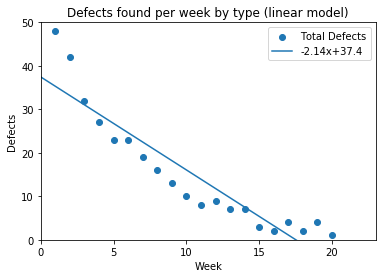


    slope:-2.136842105263158
    intercept:37.43684210526315
    r_value:-0.9238049466314452
    p_value:6.2204857533101475e-09
    std_err:0.20873717618949258
    


In [184]:

def linear_plot(x, y, offset=None):
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    y_reg = lambda x : slope * x + intercept
    print(f"slope:{slope}\nintercept:{intercept}")

    # Plot points
    plt.figure()

    x_reg = np.append([0], np.append(x, [25])) # Extend regression line beyon graph bounds
    p2 = plt.plot(x_reg, y_reg(x_reg))
    p1 = plt.scatter(x, y)
    # Graph labels
    plt.title('Defects found per week by type (linear model)')
    plt.ylabel('Defects')
    plt.xlabel('Week')
    plt.legend((p1, p2[0]), ('Total Defects', f'{slope:1.2f}x+{intercept:2.1f}'))
    plt.xticks([0,5,10,15,20])
    plt.xlim((0,23))
    plt.ylim((0, 50))
    plt.show()
    
    print(f"""
    slope:{slope}
    intercept:{intercept}
    r_value:{r_value}
    p_value:{p_value}
    std_err:{std_err}
    """)

linear_plot(w, total)

slope:-0.1786362776533267
intercept:4.108279703903424


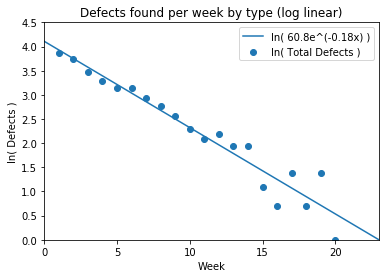

In [185]:

def log_linear_plot(x, y, offset=None):
    
    # Apply log to total
    y = np.log(y)
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    y_reg = lambda x : slope * x + intercept
    print(f"slope:{slope}\nintercept:{intercept}")

    # Plot points
    plt.figure()

    x_reg = np.append([0], np.append(x, [25])) # Extend regression line beyon graph bounds
    plt.plot(x_reg, y_reg(x_reg))
    plt.scatter(x, y)
    # Graph labels
    plt.title('Defects found per week by type (log linear)')
    plt.ylabel('ln( Defects )')
    plt.xlabel('Week')
    plt.legend((f'ln( {np.e ** intercept:2.1f}e^({slope:1.2f}x) )', 'ln( Total Defects )'))
    plt.xticks([0,5,10,15,20])
    plt.xlim((0,23))
    plt.ylim((0, 4.5))
    plt.show()

log_linear_plot(w, total)


        slope:-0.1786362776533267
        intercept:60.84196130102284
        r_value:-0.9652277213645551
        p_value:6.221278405057389e-12
        std_err:0.01140319728186079
        


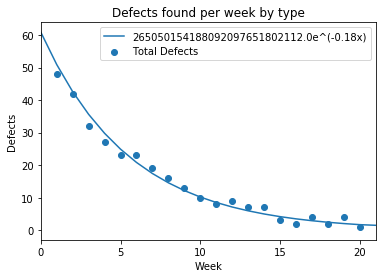


        slope:-0.1786362776533267
        intercept:55.64329387541181
        r_value:-0.9652277213645551
        p_value:6.221278405057389e-12
        std_err:0.01140319728186079
        


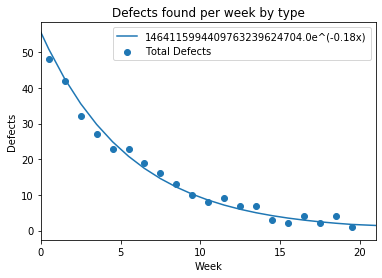

In [186]:
def log_plot(x, y, offset=None):
    # Apply offset
    if offset:
        x = np.array([element - 0.5 for element in x])
        
    # Perform linear regression
    y_reg, intercept, slope = log_lin_regress(x, y)
    # Plot points
    plt.figure()

    x_reg = np.append([0], np.append(x, [25])) # Extend regression line beyon graph bounds
    plt.plot(x_reg, y_reg(x_reg))
    plt.scatter(x, y)
    # Graph labels
    plt.title('Defects found per week by type')
    plt.ylabel('Defects')
    plt.xlabel('Week')
    plt.legend((f'{np.e ** intercept:.1f}e^({slope:.2f}x)', 'Total Defects'))
    plt.xticks([0, 5,10,15,20])
    plt.xlim((0,21))

    plt.show()

log_plot(w, total)
log_plot(w, total, offset=-0.5)


In [187]:
def log_double_plot(x, y1, y2, offset=None):
    # Apply offset
    if offset:
        x = np.array([element - 0.5 for element in x])

    # Perform Regressions
    y1_reg, a, b = lin_regress(x, y1)
    y2_reg, a, b = lin_regress(x, y2)

    # Plot points
    plt.figure()

    x_reg = np.append([0], np.append(x, [25])) # Extend regression line beyond graph bounds
    
    plt.plot(x_reg, y1_reg(x_reg))
    plt.scatter(x, y1)
    
    plt.plot(x_reg, y2_reg(x_reg))
    plt.scatter(x, y2)
    
    # Graph labels
    plt.title('Defects found per week by type')
    plt.ylabel('Defects')
    plt.xlabel('Week')
    plt.legend((f'{np.e ** a:.1f}e^({b:.2f}x)', 'Total Defects'))
    plt.xticks([0, 5,10,15,20])
    plt.xlim((0,21))

    plt.show()

log_double_plot(w, total)


TypeError: log_double_plot() missing 1 required positional argument: 'y2'


        slope:-0.177438397655804
        intercept:7.7708928274235465
        r_value:-0.7152406247614933
        p_value:0.000392810309792358
        std_err:0.040865867576690626
        

        slope:-0.15712640097656946
        intercept:7.3387892336554525
        r_value:-0.699092879757586
        p_value:0.0006040571560865088
        std_err:0.03787937666413021
        

        slope:-0.18435753529802246
        intercept:8.642245152681099
        r_value:-0.7408111010149061
        p_value:0.00018682666893388684
        std_err:0.0394004499404971
        

        slope:-0.2493743819581459
        intercept:46.39865294064115
        r_value:-0.9105151244524651
        p_value:2.5159949582467744e-08
        std_err:0.026691837930218662
        


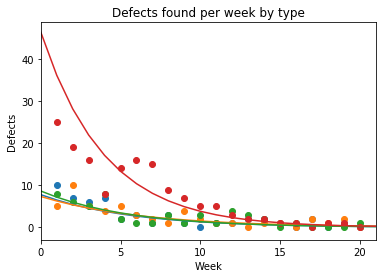

In [189]:
def log_quad_plot(x, y1, y2, y3, y4, offset=None):
    # Apply offset
    if offset:
        x = np.array([element - 0.5 for element in x])

    # Perform Regressions
    y1_reg, a, b = log_lin_regress(x, y1)
    y2_reg, a, b = log_lin_regress(x, y2)
    y3_reg, a, b = log_lin_regress(x, y3)
    y4_reg, a, b = log_lin_regress(x, y4)

    # Plot points
    plt.figure()

    x_reg = np.append([0], np.append(x, [25])) # Extend regression line beyond graph bounds
    
    plt.plot(x_reg, y1_reg(x_reg))
    plt.scatter(x, y1)
    plt.plot(x_reg, y2_reg(x_reg))
    plt.scatter(x, y2)
    plt.plot(x_reg, y3_reg(x_reg))
    plt.scatter(x, y3)
    plt.plot(x_reg, y4_reg(x_reg))
    plt.scatter(x, y4)
    
    
    # Graph labels
    plt.title('Defects found per week by type')
    plt.ylabel('Defects')
    plt.xlabel('Week')
#     plt.legend((f'{np.e ** a:.1f}e^({b:.2f}x)', 'Total Defects'))
    plt.xticks([0, 5,10,15,20])
    plt.xlim((0,21))

    plt.show()

log_quad_plot(w, hb, hs, eb, es)
